ANÁLISE DOS PREÇOS DE COMBUSTÍVEIS DE AUTOMÓVEIS NO BRASIL 

Nesta análise, apresentaremos a média dos preços de combustíveis dos automíveis (Etanol e Gasolina) por 4 semanas (29/04/2019 - 23/05/2019), separados por tipo (Gasolina/Etanol) e região do país, (Norte, Sul, Nordeste, Sudeste e Centro-Oeste). E, também as médias por data, de cada combustível em cada região.

Os dados foram retirados do site da Agência Nacional do Petróleo (ANP), no link: http://www.anp.gov.br/dados-abertos-anp , obs: Foi necessário abrir o arquivo .csv no bloco de notas e salvar com o encoding UTF-8 para que fosse possível a leitura pelo pd.read_csv, ajustar o parâmetro decimal para "," para possibilitar a conversão da coluna de Valor de Venda para o tipo float. Abaixo, podemos verificar uma amostra dos dados:

In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt2
low_memory=False
%matplotlib inline
pd.options.display.max_columns = 11
pd.options.display.max_rows = 51750
df = pd.read_csv('gasolina-etanol-u4s.csv', encoding='UTF-8', header=[0], sep='\t', decimal = ",", dtype={"Valor de Venda":float})

df.sample(10)

,Região - Sigla,Estado - Sigla,Município,Instalação - Código,Revenda,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
4939,NE,CE,IGUATU,42864,MENDONCA ALENCAR & CIA LTDA,ETANOL,08/05/2019,3.890,NaN,R$ / litro,BRANCA
32290,S,SC,FLORIANOPOLIS,53956,POSTO GALO LTDA,GASOLINA,14/05/2019,4.299,NaN,R$ / litro,IPIRANGA
22609,CO,MT,SINOP,158837,AUTO POSTO LOZZI LTDA,GASOLINA,15/05/2019,4.670,NaN,R$ / litro,BRANCA
41591,SE,SP,RIO CLARO,34722,AUTO POSTO CONFIANTE 4 LTDA,GASOLINA,30/04/2019,4.259,3.8700,R$ / litro,RAIZEN
36639,SE,RJ,RIO DE JANEIRO,23753,POSTO DE GASOLINA ILHA LTDA,GASOLINA,30/04/2019,4.899,4.3487,R$ / litro,BRANCA
24910,NE,BA,IRECE,191169,COMERCIAL RADAR COMBUSTIVEIS LTDA - ME,GASOLINA,06/05/2019,4.658,4.1100,R$ / litro,BRANCA
37435,SE,SP,AMPARO,30672,J M ANDRETA & CIA LTDA,GASOLINA,13/05/2019,4.490,3.8500,R$ / litro,IPIRANGA
11812,SE,MG,SETE LAGOAS,14507,POSTO REAL SETE LTDA,ETANOL,01/05/2019,3.350,3.0940,R$ / litro,BRANCA
12081,SE,MG,UBERABA,46580,POSTO VIA AZUL LTDA,ETANOL,22/05/2019,3.369,NaN,R$ / litro,BRANCA
6376,NE,PI,TERESINA,19951,POSTO MAGNOLIA LTDA,ETANOL,14/05/2019,3.759,NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


Abaixo, podemos ver a tabela com a média dos preços de combustíveis dos automíveis, das últimas 4 semanas (29/04/2019 - 23/05/2019), separados por tipo e região do país, mais abaixo vemos o gráfico dela com o Etanol em amarelo e Gasolina em Vermelho, nele podemos ver que o combustível mais barato em média é o da região Centro-Oeste:

In [2]:
e = df.groupby(['Região - Sigla', 'Produto' ])['Valor de Venda'].agg(np.mean)
print (e)

Região - Sigla  Produto 
CO              ETANOL      3.096001
                GASOLINA    4.588606
N               ETANOL      3.814161
                GASOLINA    4.665723
NE              ETANOL      3.694435
                GASOLINA    4.662358
S               ETANOL      3.520233
                GASOLINA    4.533050
SE              ETANOL      3.149874
                GASOLINA    4.548838
Name: Valor de Venda, dtype: float64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x113365F0>],
      dtype=object)

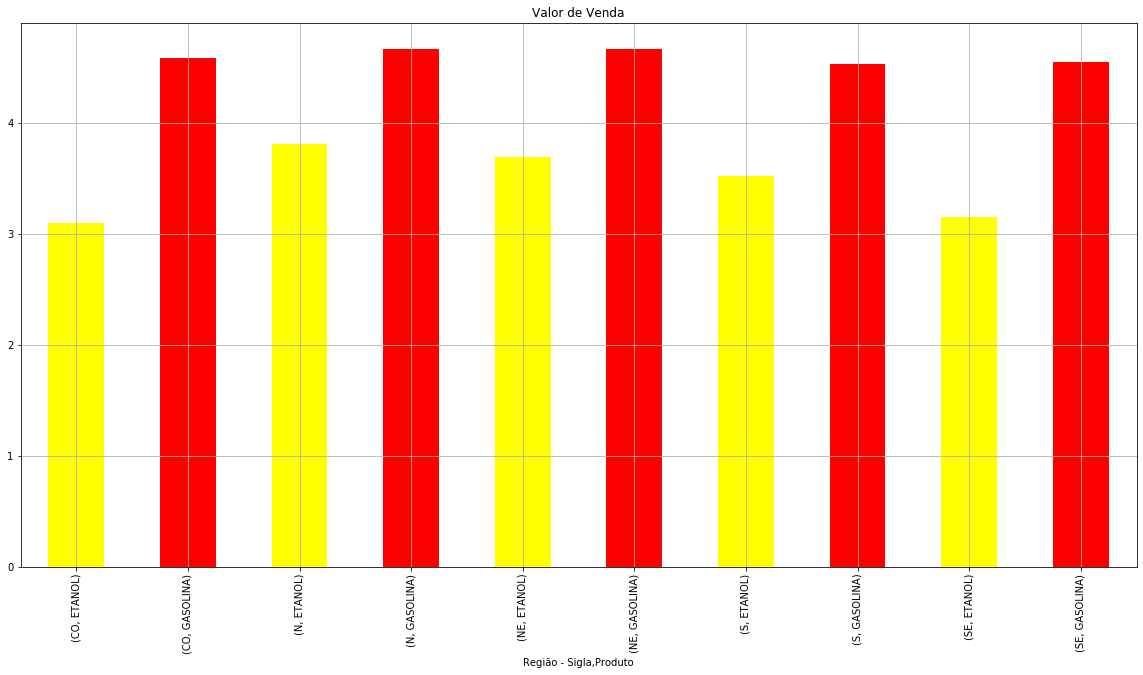

In [3]:
e.plot( kind = "bar", figsize = (20,10), grid = (True), x=("Região - Sigla", "Produto", "Data de Coleta"), y =('Valor de Venda'),  subplots = True, color=['yellow', 'red', 'yellow', 'red','yellow', 'red','yellow', 'red','yellow', 'red'])

Agora mostraremos a média do Valor de Venda por Data de coleta, separados por tipo de combustível (Etanol em amarelo e Gasolina em Vermelho) e data de coleta em cada região.

Região Centro-Oeste:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0A162490>],
      dtype=object)

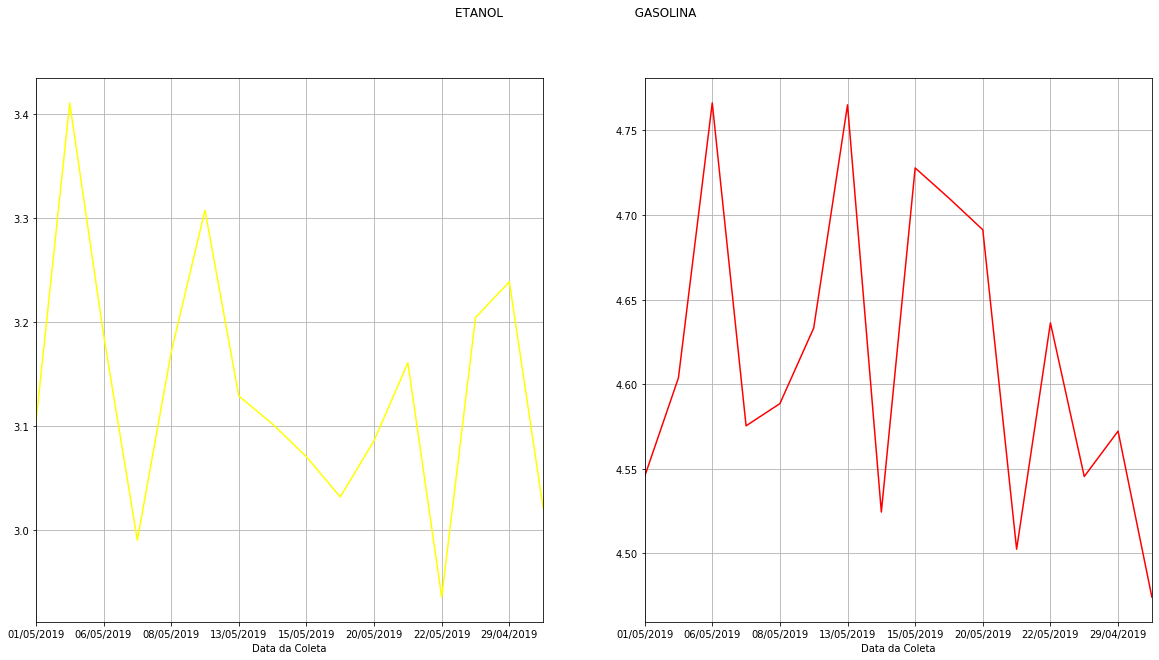

In [4]:
COE=df.groupby(['Região - Sigla']).get_group('CO').groupby(['Produto']).get_group('ETANOL').groupby(['Data da Coleta' ])['Valor de Venda'].agg(np.mean)
COG=df.groupby(['Região - Sigla']).get_group('CO').groupby(['Produto']).get_group('GASOLINA').groupby(['Data da Coleta' ])['Valor de Venda'].agg(np.mean)
fig, axs = plt2.subplots(1,2, figsize = (20,10))
COE.plot(ax=axs[0], grid = (True), subplots = True, color=['yellow'], title = "ETANOL                                  GASOLINA")
COG.plot(ax=axs[1], grid = (True), subplots = True, color=['red'])

Região Norte:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x12798570>],
      dtype=object)

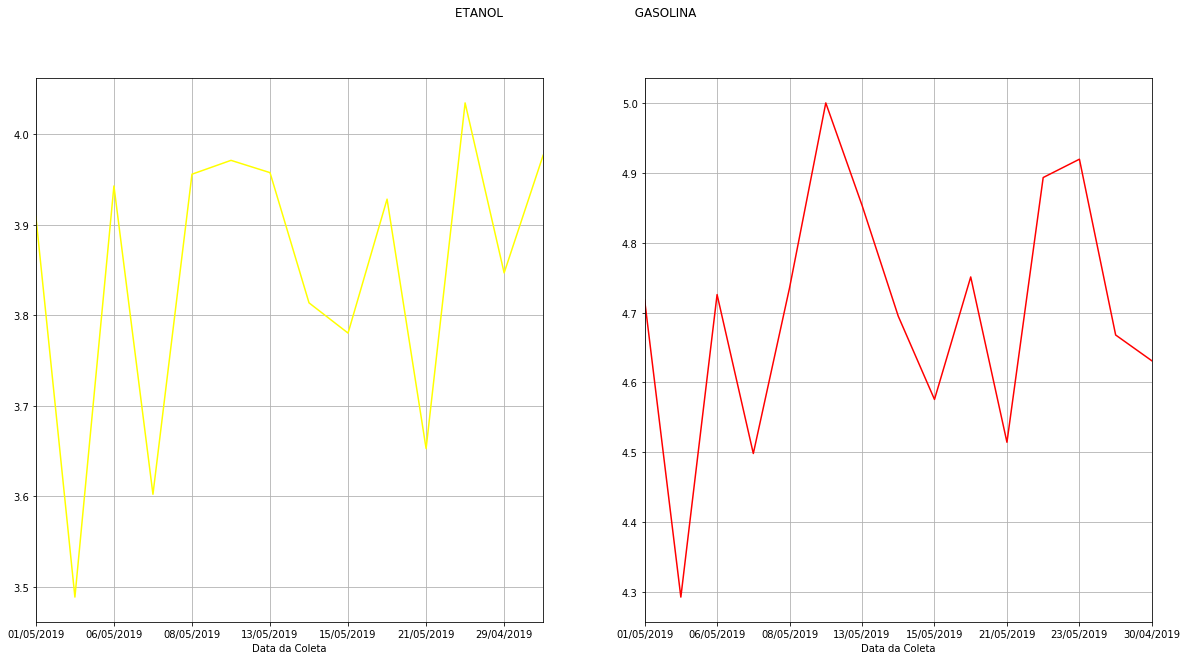

In [5]:
NE=df.groupby(['Região - Sigla']).get_group('N').groupby(['Produto']).get_group('ETANOL').groupby(['Data da Coleta' ])['Valor de Venda'].agg(np.mean)
NG=df.groupby(['Região - Sigla']).get_group('N').groupby(['Produto']).get_group('GASOLINA').groupby(['Data da Coleta' ])['Valor de Venda'].agg(np.mean)
fig, axs = plt2.subplots(1,2, figsize = (20,10))
NE.plot(ax=axs[0], grid = (True), subplots = True, color=['yellow'], title = "ETANOL                                  GASOLINA")
NG.plot(ax=axs[1], grid = (True), subplots = True, color=['red'])

Região Nordeste:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x049A20F0>],
      dtype=object)

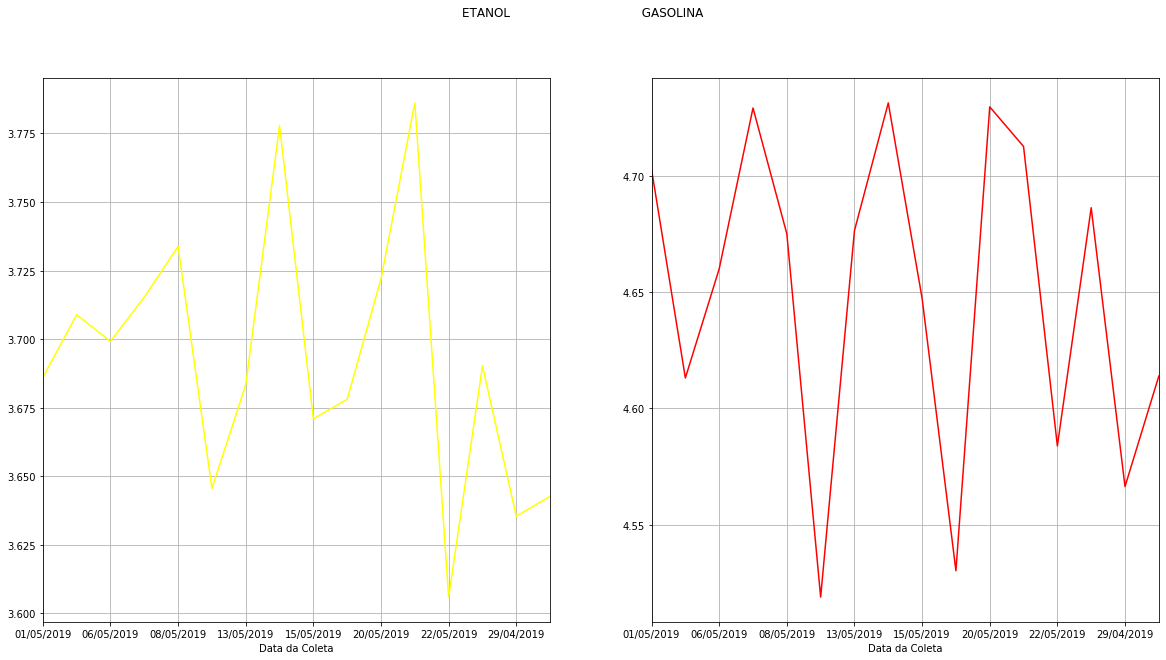

In [6]:
NEE=df.groupby(['Região - Sigla']).get_group('NE').groupby(['Produto']).get_group('ETANOL').groupby(['Data da Coleta' ])['Valor de Venda'].agg(np.mean)
NEG=df.groupby(['Região - Sigla']).get_group('NE').groupby(['Produto']).get_group('GASOLINA').groupby(['Data da Coleta' ])['Valor de Venda'].agg(np.mean)
fig, axs = plt2.subplots(1,2, figsize = (20,10))
NEE.plot(ax=axs[0], grid = (True), subplots = True, color=['yellow'], title = "ETANOL                                  GASOLINA")
NEG.plot(ax=axs[1], grid = (True), subplots = True, color=['red'])

Região Sul:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x04A1FA10>],
      dtype=object)

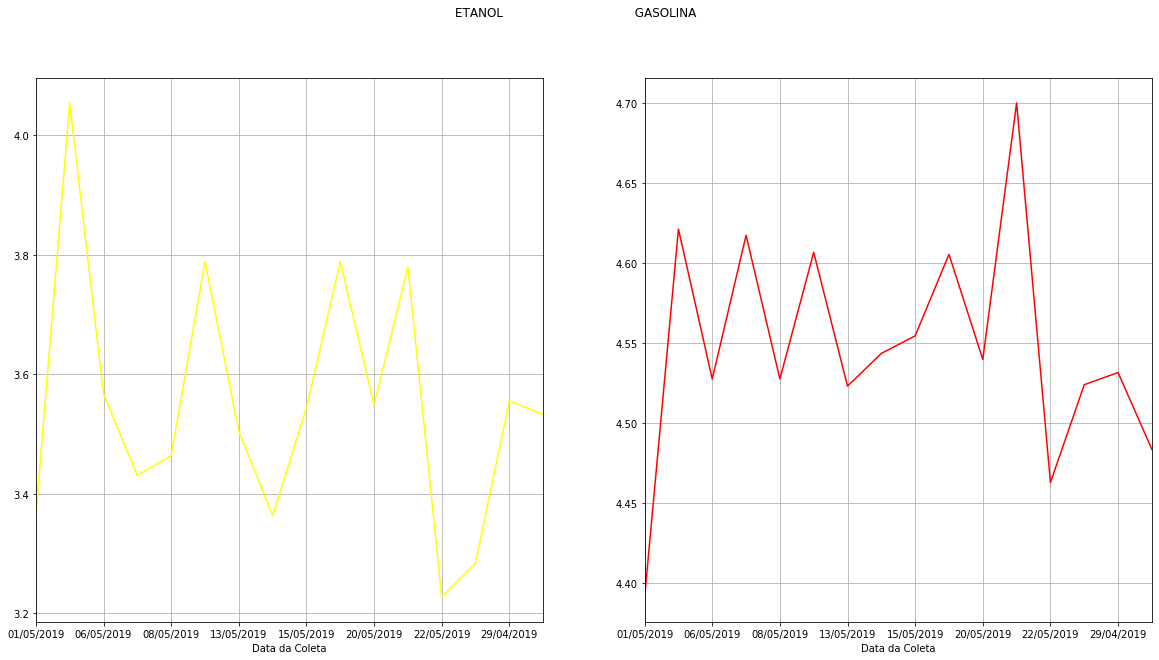

In [7]:
SE=df.groupby(['Região - Sigla']).get_group('S').groupby(['Produto']).get_group('ETANOL').groupby(['Data da Coleta' ])['Valor de Venda'].agg(np.mean)
SG=df.groupby(['Região - Sigla']).get_group('S').groupby(['Produto']).get_group('GASOLINA').groupby(['Data da Coleta' ])['Valor de Venda'].agg(np.mean)
fig, axs = plt2.subplots(1,2, figsize = (20,10))
SE.plot(ax=axs[0], grid = (True), subplots = True, color=['yellow'], title = "ETANOL                                  GASOLINA")
SG.plot(ax=axs[1], grid = (True), subplots = True, color=['red'])

E Região Sudeste:

array([<matplotlib.axes._subplots.AxesSubplot object at 0x04A9F550>],
      dtype=object)

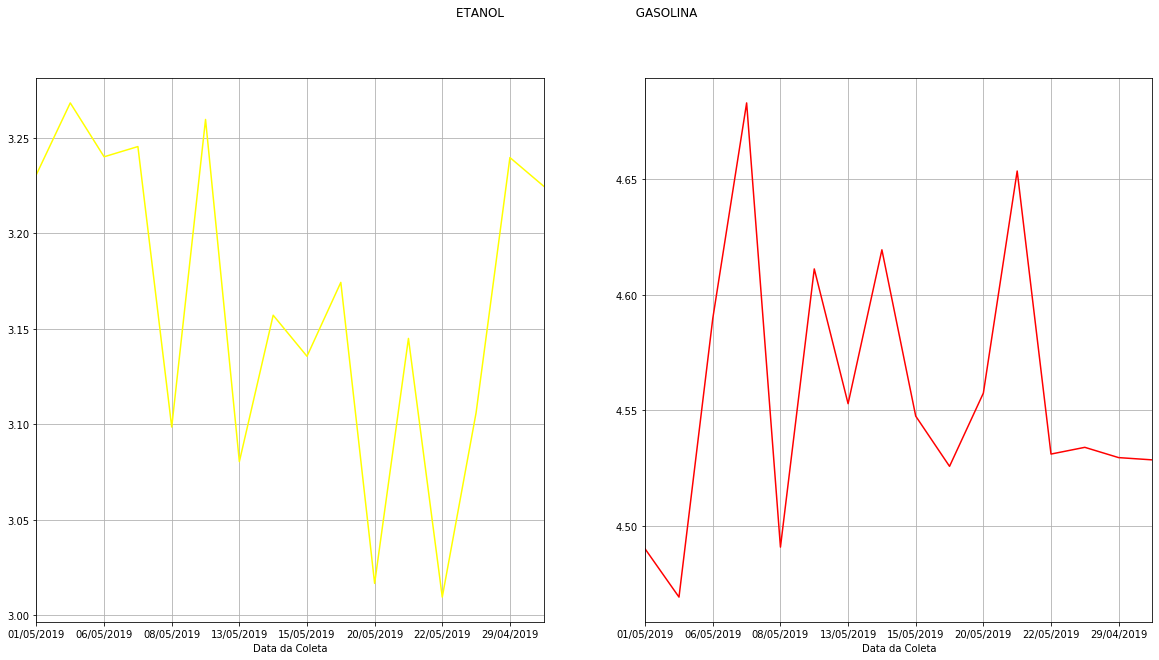

In [8]:
SEE=df.groupby(['Região - Sigla']).get_group('SE').groupby(['Produto']).get_group('ETANOL').groupby(['Data da Coleta' ])['Valor de Venda'].agg(np.mean)
SEG=df.groupby(['Região - Sigla']).get_group('SE').groupby(['Produto']).get_group('GASOLINA').groupby(['Data da Coleta' ])['Valor de Venda'].agg(np.mean)
fig, axs = plt2.subplots(1,2, figsize = (20,10))
SEE.plot(ax=axs[0], grid = (True), subplots = True, color=['yellow'], title = "ETANOL                                  GASOLINA")
SEG.plot(ax=axs[1], grid = (True), subplots = True, color=['red'])

Através desta análise, pudemos verificar que o a média mais barata do valor do Etanol é da região Centro-Oeste e a média mais barata da Gasolina é a da região Sudeste, estas duas citadas são as que possuem a menor média de valor para os dois combustíveis.
Pudemos observar também que eles possuem flutuações de preço parecidas, o que provavelmente leva a crer que tenham a mesma motivação ou coisa parecida.